In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset:

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [2]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 23.23 MiB/s, done.
Resolving deltas: 100% (10/10), done.


## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.preprocessing.image import load_img

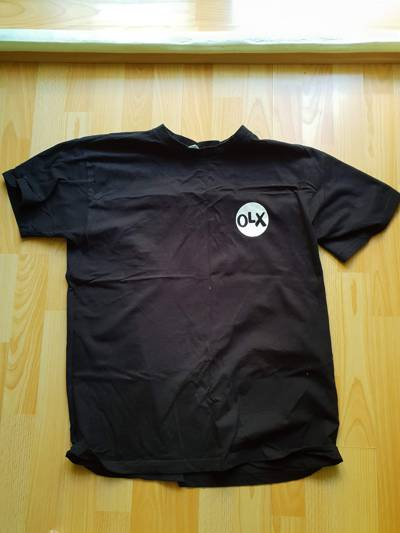

In [6]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [7]:
img = load_img(fullname, target_size=(299, 299))

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [11]:
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [15]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', 0.68196356),
  ('n02916936', 'bulletproof_vest', 0.038139995),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354207),
  ('n04525038', 'velvet', 0.0018453562)]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
X, y = next(train_ds)

In [20]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [21]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [22]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [23]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [24]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 236ms/step - accuracy: 0.5931 - loss: 1.4906 - val_accuracy: 0.7507 - val_loss: 0.9078
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.8316 - loss: 0.5779 - val_accuracy: 0.6891 - val_loss: 1.3327
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.8561 - loss: 0.4209 - val_accuracy: 0.7801 - val_loss: 0.9605
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.9110 - loss: 0.2239 - val_accuracy: 0.7713 - val_loss: 0.9852
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9270 - loss: 0.2063 - val_accuracy: 0.8035 - val_loss: 0.9737
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9561 - loss: 0.1208 - val_accuracy: 0.7771 - val_loss: 1.0560
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.9696 - loss: 0.0866 - val_accuracy: 0.8065 - val_loss: 0.8702
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.9813 - loss: 0.0604 - val_accuracy: 0.8152 - val_lo

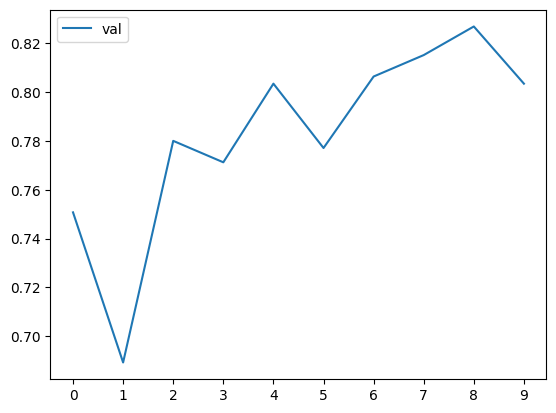

In [26]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [27]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [28]:
"""
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()
"""

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.2222 - loss: 2.2143 - val_accuracy: 0.5191 - val_loss: 1.6076
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.5457 - loss: 1.4665 - val_accuracy: 0.6276 - val_loss: 1.2543
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.6513 - loss: 1.1736 - val_accuracy: 0.6716 - val_loss: 1.0700
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.7014 - loss: 1.0000 - val_accuracy: 0.7214 - val_loss: 0.9591
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.7165 - loss: 0.9252 - val_accuracy: 0.7302 - val_loss: 0.8870
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.7508 - loss: 0.8421 - val_accuracy: 0.7419 - val_loss: 0.8349
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.7554 - loss: 0.7903 - val_accuracy: 0.7507 - val_loss: 0.7932
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.7694 - loss: 0.7425 - val_accuracy

In [30]:
del scores[0.1]
del scores[0.0001]

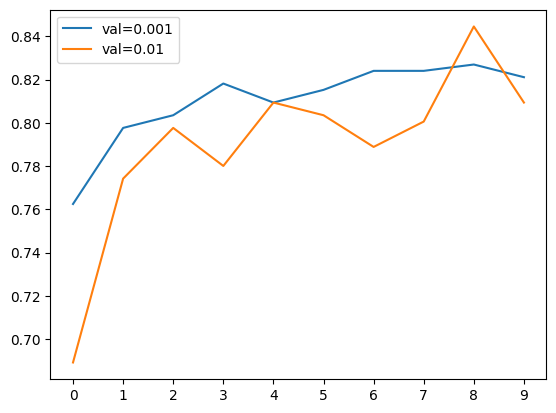

In [31]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [32]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [35]:
model.save_weights('model_v1.weights.h5') # Changed

In [39]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',  # Changed .h5 to .keras
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [40]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.4999 - loss: 1.4769 - val_accuracy: 0.7859 - val_loss: 0.6889
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - accuracy: 0.7906 - loss: 0.6283 - val_accuracy: 0.8152 - val_loss: 0.6026
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.8502 - loss: 0.4803 - val_accuracy: 0.8182 - val_loss: 0.5587
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8814 - loss: 0.4106 - val_accuracy: 0.8094 - val_loss: 0.5375
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.8998 - loss: 0.3556 - val_accuracy: 0.8387 - val_loss: 0.5148
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9107 - loss: 0.3201 - val_accuracy: 0.8416 - val_loss: 0.5190
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.9305 - loss: 0.2827 - val_accuracy: 0.8123 - val_loss: 0.5449
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.9372 - loss: 0.2455 - val_accuracy:

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [41]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [42]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 166ms/step - accuracy: 0.4047 - loss: 1.8113 - val_accuracy: 0.6657 - val_loss: 1.1148
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.6674 - loss: 1.0564 - val_accuracy: 0.7478 - val_loss: 0.8543
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.7614 - loss: 0.7403 - val_accuracy: 0.7713 - val_loss: 0.7361
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.8303 - loss: 0.5717 - val_accuracy: 0.7683 - val_loss: 0.6990
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.8429 - loss: 0.4846 - val_accuracy: 0.7771 - val_loss: 0.6545
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.8729 - loss: 0.3998 - val_accuracy: 0.7918 - val_loss: 0.6442
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.8998 - loss: 0.3385 - val_accuracy: 0.7771 - val_loss: 0.6492
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.9171 - loss: 0.2930 - val_accuracy: 0

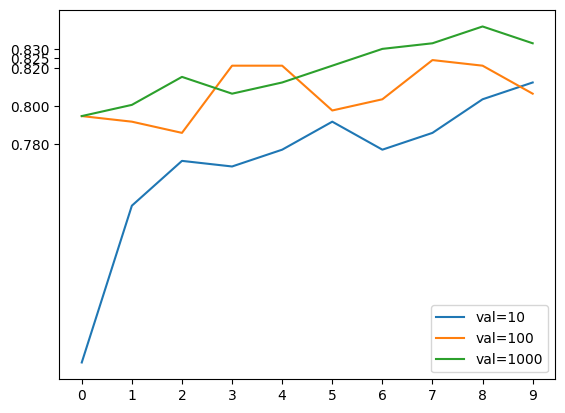

In [43]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [44]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [45]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 159ms/step - accuracy: 0.5784 - loss: 1.2628 - val_accuracy: 0.7771 - val_loss: 0.6755
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.8192 - loss: 0.5147 - val_accuracy: 0.7801 - val_loss: 0.6321
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.8795 - loss: 0.3524 - val_accuracy: 0.8152 - val_loss: 0.5301
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9254 - loss: 0.2453 - val_accuracy: 0.8328 - val_loss: 0.5158
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9571 - loss: 0.1736 - val_accuracy: 0.8211 - val_loss: 0.5764
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9725 - loss: 0.1161 - val_accuracy: 0.8152 - val_loss: 0.5966
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.9837 - loss: 0.0973 - val_accuracy: 0.8123 - val_loss: 0.5887
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9942 - loss: 0.0610 - val_accuracy: 

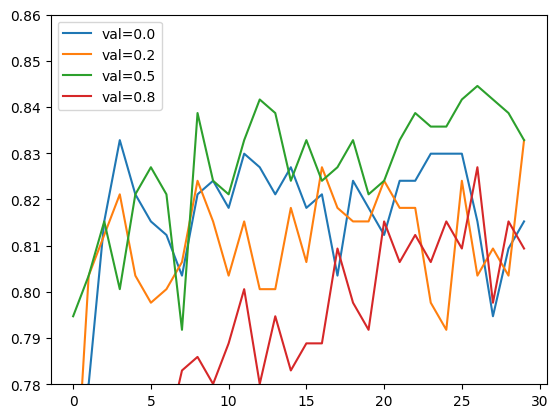

In [46]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

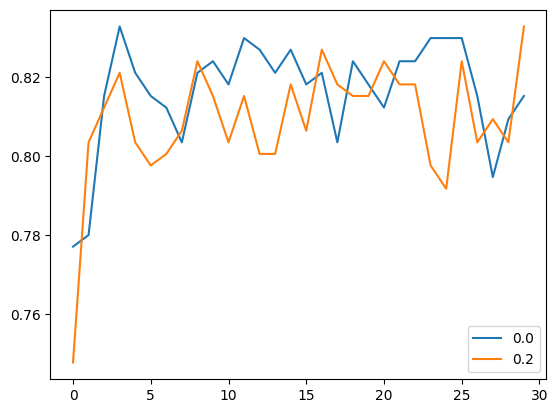

In [49]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [50]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [51]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 153ms/step - accuracy: 0.5459 - loss: 1.3437 - val_accuracy: 0.7771 - val_loss: 0.6724
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.7956 - loss: 0.5869 - val_accuracy: 0.8035 - val_loss: 0.5737
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8626 - loss: 0.4119 - val_accuracy: 0.8065 - val_loss: 0.5683
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.8868 - loss: 0.3307 - val_accuracy: 0.7859 - val_loss: 0.5845
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9152 - loss: 0.2696 - val_accuracy: 0.8446 - val_loss: 0.5305
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9382 - loss: 0.2045 - val_accuracy: 0.8416 - val_loss: 0.5366
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9525 - loss: 0.1739 - val_accuracy: 0.8299 - val_loss: 0.5135
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9774 - loss: 0.1180 - val_accuracy: 0.8416 - val_los

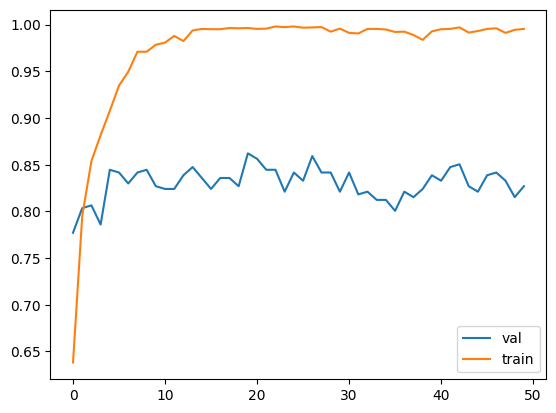

In [52]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [53]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [54]:
input_size = 299

In [55]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [57]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [75]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=2, validation_data=val_ds, # epoch 100 to 2
                   callbacks=[checkpoint])

Epoch 1/2
96/96 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.5646 - loss: 1.4075 - val_accuracy: 0.8240 - val_loss: 0.5321
Epoch 2/2
96/96 ━━━━━━━━━━━━━━━━━━━━ 126s 899ms/step - accuracy: 0.8267 - loss: 0.5496 - val_accuracy: 0.8622 - val_loss: 0.4193


## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [76]:
import tensorflow as tf
from tensorflow import keras

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [78]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [79]:
model = keras.models.load_model('xception_v4_1_02_0.862.keras') # Actual name

In [80]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8380 - loss: 0.4968


[0.37344133853912354, 0.8763440847396851]

In [81]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [82]:
img = load_img(path, target_size=(299, 299))

In [83]:
import numpy as np

In [84]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [85]:
X = preprocess_input(X)

In [86]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [87]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [90]:
dict(zip(classes, pred[0]))

{'dress': -1.9189612,
 'hat': -2.4661813,
 'longsleeve': -0.40715313,
 'outwear': -1.5894761,
 'pants': 7.006818,
 'shirt': -0.3805204,
 'shoes': -3.5763543,
 'shorts': 2.5084264,
 'skirt': -1.4959053,
 't-shirt': -1.3873534}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

